# Implementing Multiclass Classification
Let’s understand how to do multiclass classification for text data in Python through solving Consumer complaint classifications for the finance industry.

# PROBLEM
Each week the Consumer Financial Protection Bureau sends thousands of consumers’ complaints about financial products and services to companies for a response. Classify those consumer complaints into the product category it belongs to using the description of the complaint.

# SOLUTION
The goal of the project is to classify the complaint into a specific product category. Since it has multiple categories, it becomes a multiclass classification that can be solved through many of the machine learning algorithms.

Once the algorithm is in place, whenever there is a new complaint, we can easily categorize it and can then be redirected to the concerned person. This will save a lot of time because we are minimizing the human intervention to decide whom this complaint should go to.

# HOW IT WORKS
Let’s explore the data and build classification problem using many machine learning algorithms and see which one gives better results.

In [2]:
#Import the libraries
#Here are the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

In [3]:
#Importing the data
#Import the data that was downloaded in the last step:
Data = pd.read_csv("Consumer_Complaints.csv",encoding='latin-1')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
Data.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [7]:
# Selecting required columns and rows
Data = Data[['product', 'consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

In [8]:
# See top 5 rows
Data.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [9]:
# Factorizing the category column
Data['category_id'] = Data['product'].factorize()[0]
Data.head()

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [10]:
# Check the distriution of complaints by category
Data.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

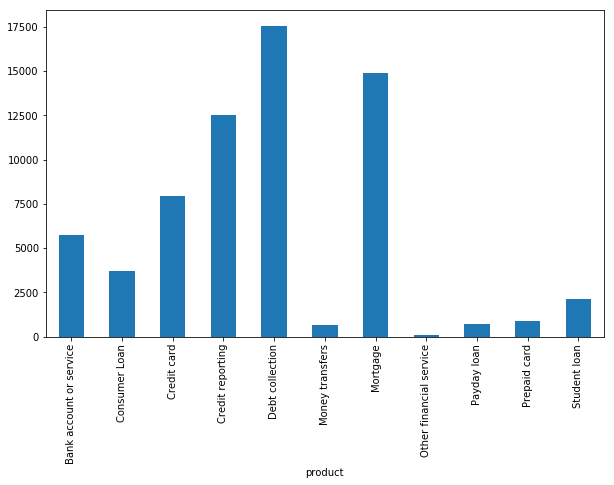

In [12]:
# Lets plot it and see
fig = plt.figure(figsize=(10,6))
Data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

Debt collection and Mortgage have the highest number of complaints registered.

In [14]:
 #Splitting the data
#Split the data into train and validation:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['consumer_complaint_narrative'], Data['product'])

In [15]:
#Feature engineering using TF-IDF
#Create TF-IDF vectors as we discussed in Chapter 3. Here we consider maximum features to be 5000.
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Data['consumer_complaint_narrative'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# Model building and evaluation
Suppose we are building a linear classifier on word-level TF-IDF vectors. We are using default hyper parameters for the classifier. Parameters can be changed like C, max_iter, or solver to obtain better results.


In [16]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)
# Model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class="ovr", n_jobs=1,
          penalty='l2', random_state=None, solver="liblinear", tol=0.0001,
          verbose=0, warm_start=False)
# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf), valid_y)
print ("Accuracy: ", accuracy)
Accuracy:  0.845048497186
# Classification report
print(metrics.classification_report(valid_y, model.predict(xvalid_tfidf),target_names=Data['product'].unique()))

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy:  0.8440306550113759
                         precision    recall  f1-score   support

        Debt collection       0.82      0.81      0.81      1407
          Consumer Loan       0.80      0.57      0.66       907
               Mortgage       0.81      0.81      0.81      1977
            Credit card       0.86      0.85      0.85      3155
       Credit reporting       0.81      0.90      0.85      4412
           Student loan       0.83      0.46      0.59       183
Bank account or service       0.91      0.95      0.93      3704
            Payday loan       0.00      0.00      0.00        25
        Money transfers       0.78      0.25      0.37       182
Other financial service       0.80      0.62      0.70       210
           Prepaid card       0.88      0.76      0.81       540

              micro avg       0.84      0.84      0.84     16702
              macro avg       0.75      0.63      0.67     16702
           weighted avg       0.84      0.84      0.84    

D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))

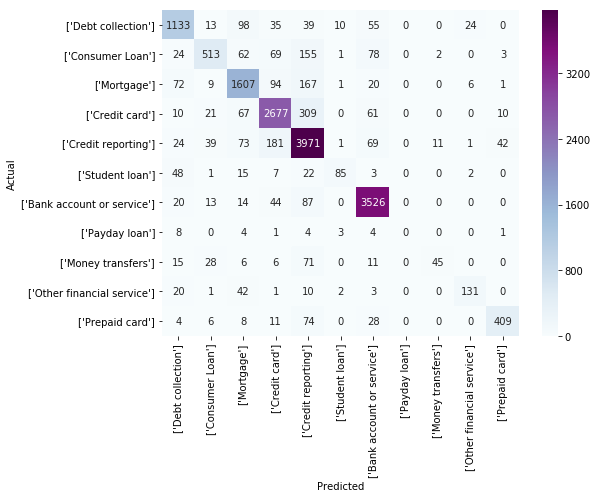

In [21]:
## Vizualizing confusion matrix
category_id_df = Data[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",
            xticklabels=category_id_df[['product']].values, yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The accuracy of 85% is good for a baseline model. Precision and recall look pretty good across the categories except for “Payday loan.” If you look for Payload loan, most of the wrong predictions are Debt collection and Credit card, which might be because of the smaller number of samples in that category. It also sounds like it’s a subcategory of a credit card. We can add these samples to any other group to make the model more stable. Let’s see what prediction looks like for one example.


In [22]:
# Prediction example
texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
print(texts)
print("  - Predicted as: '{}'".format(id_to_category[predictions[0]]))

['This company refuses to provide me verification and validation of debtper my right under the FDCPA. I do not believe this debt is mine.']
  - Predicted as: 'Credit reporting'


To increase the accuracy, we can do the following things:
1. Reiterate the process with different algorithms like Random Forest, SVM, GBM, Neural Networks, Naive Bayes.

2. Deep learning techniques like RNN and LSTM (will be discussed in next chapter) can also be used.

3. In each of these algorithms, there are so many parameters to be tuned to get better results. It can be easily done through Grid search, which will basically try out all possible combinations and give the best out.